In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels.api as sm
from sklearn import linear_model

AAPL = pd.read_csv(r'../data/AAPL.csv', index_col = 0)
IBM = pd.read_csv(r'../data/IBM.csv', index_col = 0)
JPM = pd.read_csv(r'../data/JPM.csv', index_col = 0)
DJI = pd.read_csv(r'../data/DJI.csv', index_col = 0)

stock_names = ["AAPL", "IBM", "JPM", "DJI"]

AAPL['1DReturn'] = AAPL['Adj Close'].pct_change()
IBM['1DReturn'] = IBM['Adj Close'].pct_change()
JPM['1DReturn'] = JPM['Adj Close'].pct_change()
DJI['1DReturn'] = DJI['Adj Close'].pct_change()

stocks = [AAPL, IBM, JPM, DJI]
asdf = ["a","b","c","d"]


AAPL["Close with outlier"] = AAPL["Adj Close"]
IBM["Close with outlier"] = IBM["Adj Close"]
JPM["Close with outlier"] = JPM["Adj Close"]
DJI["Close with outlier"] = DJI["Adj Close"]

for stock in stocks:
    stock_max = stock["Close with outlier"].max()*1.2
    stock["Close with outlier"].loc[stock.index[40]] = stock_max
    stock["Close with outlier"].loc[stock.index[126]] = stock_max
    stock["Close with outlier"].loc[stock.index[189]] = stock_max
    stock["Close with outlier"].loc[stock.index[208]] = stock_max

AAPL['1DReturn_outlier'] = AAPL['Close with outlier'].pct_change()
IBM['1DReturn_outlier'] = IBM['Close with outlier'].pct_change()
JPM['1DReturn_outlier'] = JPM['Close with outlier'].pct_change()
DJI['1DReturn_outlier'] = DJI['Close with outlier'].pct_change()

C:\Users\thtan\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<Figure size 432x288 with 0 Axes>

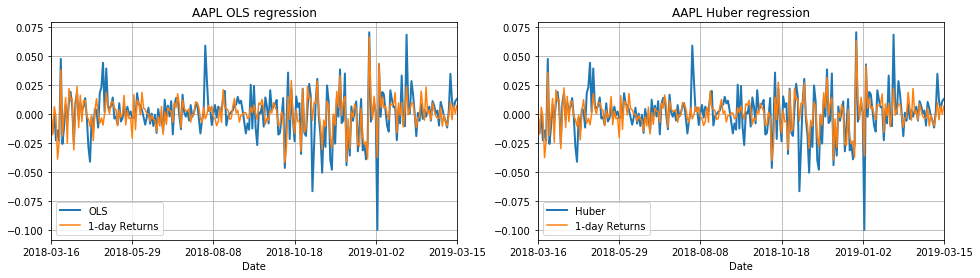

<Figure size 432x288 with 0 Axes>

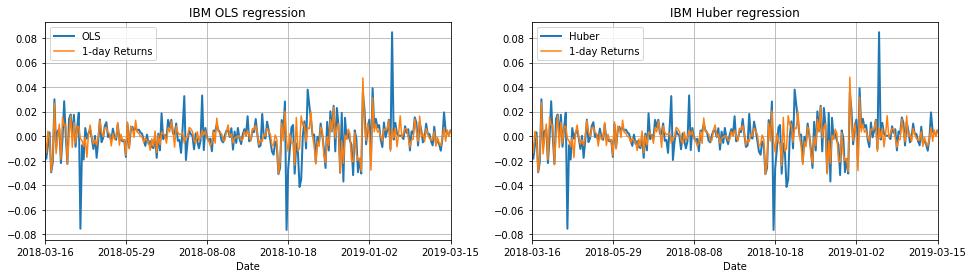

<Figure size 432x288 with 0 Axes>

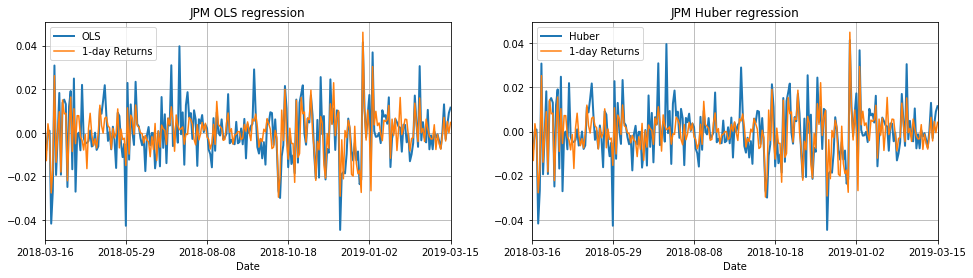

In [2]:
for i,stock in enumerate(stocks[:-1]):
    plt.figure()
    figure(figsize=(16,4))
    plt.subplot(121)
    model = linear_model.LinearRegression()

    y = np.array([DJI['1DReturn'].dropna()]).T
    x = stock['1DReturn'].dropna()

    model.fit(y,x)
    stock['OLS'] = np.append(0,model.predict(y))
    stock['1DReturn'].plot(lw=2)
    stock['OLS'].plot()

    plt.grid()
    plt.title(stock_names[i] +' OLS regression')
    plt.legend(["OLS", "1-day Returns"])
    ##########################################################################################
    plt.subplot(122)
    model = linear_model.HuberRegressor()

    y = np.array([DJI['1DReturn'].dropna()]).T
    x = stock['1DReturn'].dropna()

    model.fit(y,x)
    stock['Huber'] = np.append(0,model.predict(y))
    stock['1DReturn'].plot(lw=2)
    stock['Huber'].plot()

    plt.grid()
    plt.title(stock_names[i] +' Huber regression')
    plt.legend(["Huber", "1-day Returns"])
    
    dest = "../result/4_3_1_"+str(asdf[i])+".png"
    plt.savefig(dest,dpi=1200)

<Figure size 432x288 with 0 Axes>

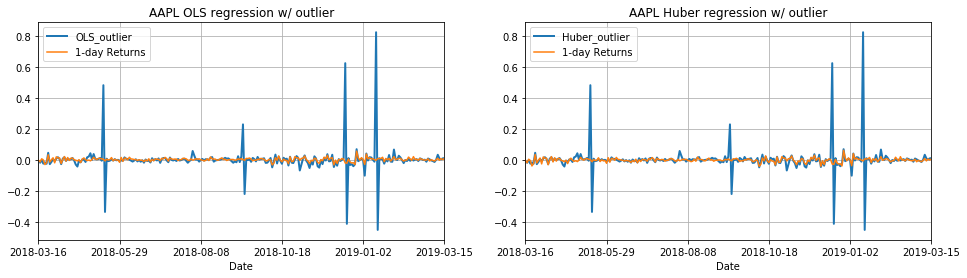

<Figure size 432x288 with 0 Axes>

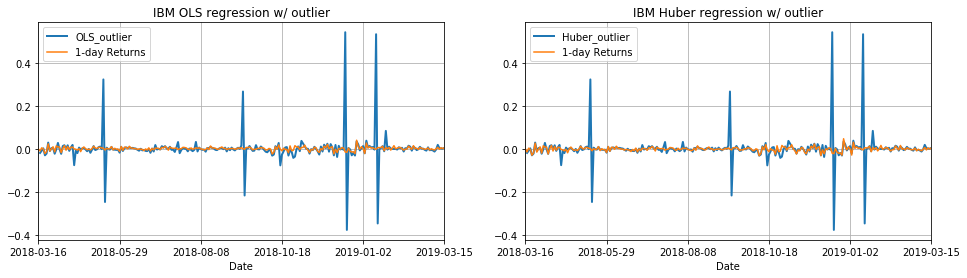

<Figure size 432x288 with 0 Axes>

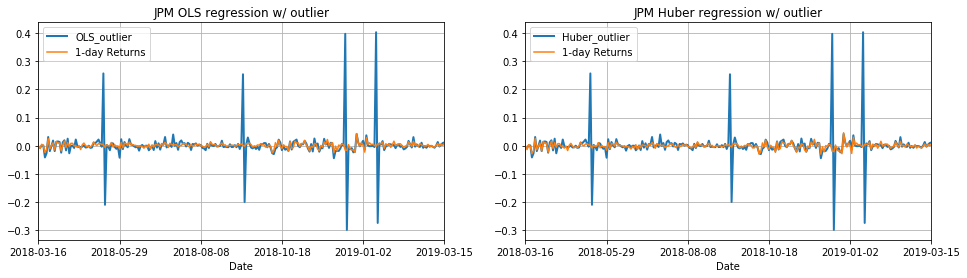

In [3]:
for i,stock in enumerate(stocks[:-1]):
    plt.figure()
    figure(figsize=(16,4))
    plt.subplot(121)
    model = linear_model.LinearRegression()

    y = np.array([DJI['1DReturn'].dropna()]).T
    x = stock['1DReturn_outlier'].dropna()

    model.fit(y,x)
    stock['OLS_outlier'] = np.append(0,model.predict(y))
    stock['1DReturn_outlier'].plot(lw=2)
    stock['OLS_outlier'].plot()

    plt.grid()
    plt.title(stock_names[i] +' OLS regression w/ outlier')
    plt.legend(["OLS_outlier", "1-day Returns"])
    ##########################################################################################
    plt.subplot(122)
    model = linear_model.HuberRegressor()

    y = np.array([DJI['1DReturn'].dropna()]).T
    x = stock['1DReturn_outlier'].dropna()

    model.fit(y,x)
    stock['Huber_outlier'] = np.append(0,model.predict(y))
    stock['1DReturn_outlier'].plot(lw=2)
    stock['Huber_outlier'].plot()

    plt.grid()
    plt.title(stock_names[i] +' Huber regression w/ outlier')
    plt.legend(["Huber_outlier", "1-day Returns"])
    
    dest = "../result/4_3_2_"+str(asdf[i])+".png"
    plt.savefig(dest,dpi=1200)